In [1]:
import gymnasium as gym
from gymnasium.wrappers.vector import NumpyToTorch
import torch
import matplotlib.pyplot as plt
from src.ppo import *

In [2]:
num_envs = 16
env = gym.make_vec('HalfCheetah-v5', num_envs)
env = NumpyToTorch(env)

In [3]:
env.observation_space

Box(-inf, inf, (16, 17), float64)

In [4]:
env.observation_space.sample()

array([[ 0.65642861, -0.9663239 ,  0.5943092 ,  0.2717347 , -0.04917353,
        -0.41914036,  1.41744938,  0.36967341, -0.80415476,  0.745601  ,
        -0.76530812,  0.71361435,  0.38114404, -1.04370008,  0.75217671,
        -1.6416093 , -1.17106797],
       [-0.44793396,  1.16337383, -0.74298456, -0.79616424,  0.11174146,
         1.13869358, -0.92582277, -0.36100719, -0.84824971,  1.67629565,
        -0.60117633,  1.21997371, -0.66812052, -0.92391417,  0.67018333,
        -1.38526863,  0.31245715],
       [ 0.83723578,  0.07388074,  1.99360408, -0.0359002 , -0.19916868,
         1.0429635 , -0.16567591, -0.25373291, -0.62910131,  1.22761027,
        -0.87487853, -0.33326555,  0.5572445 , -0.95791116, -0.35216746,
         0.49431128,  0.08932388],
       [-1.03347284,  1.65669937, -1.81818924,  0.88191745,  0.09984399,
         0.36184348, -0.46674337,  1.40421532, -0.73082482, -0.62048931,
        -0.43405626, -1.00041506, -0.43711284, -1.14097046,  0.98990002,
         0.16816727

In [5]:
env.observation_space.sample().shape

(16, 17)

In [6]:
env.action_space

Box(-1.0, 1.0, (16, 6), float32)

In [7]:
env.action_space.sample()

array([[ 0.2654903 ,  0.5131394 ,  0.7273054 , -0.5890317 ,  0.8324098 ,
        -0.6560354 ],
       [-0.04488808, -0.62411505,  0.21714996,  0.46412623, -0.13769215,
        -0.52518964],
       [ 0.9513063 ,  0.33293793, -0.5950682 ,  0.46830684, -0.14252362,
        -0.90991074],
       [-0.1822664 , -0.39575875,  0.4088763 , -0.9995682 , -0.44105145,
         0.21764138],
       [-0.7953673 ,  0.984815  ,  0.66738373,  0.46581712, -0.42573163,
         0.5868075 ],
       [ 0.05339785, -0.12117621, -0.37734374, -0.08344396,  0.7040779 ,
        -0.61382973],
       [-0.9693943 ,  0.38683015, -0.76150584, -0.56070995, -0.41890648,
        -0.7155626 ],
       [ 0.55811083,  0.77381384, -0.10964354, -0.7852532 ,  0.05636741,
         0.7674778 ],
       [-0.03118682,  0.26430485, -0.0310088 , -0.28005627,  0.06727844,
         0.5557651 ],
       [-0.30488378, -0.7635608 , -0.29812816,  0.62640184, -0.42310902,
         0.30028576],
       [-0.5944079 ,  0.612194  ,  0.9273332 , -0.

In [8]:
env.action_space.sample().shape

(16, 6)

In [9]:
sample_state, _ = env.reset()
sample_action = env.action_space.sample()

In [10]:
sample_state = sample_state.to(dtype = torch.float32)

In [11]:
next_state, reward, done, terminated, _ = env.step(sample_action)

In [12]:
reward

tensor([ 0.0387, -0.7206, -0.7974, -0.5935,  0.1028, -0.3826,  0.2889,  0.0243,
        -0.6794, -0.4540,  0.2690,  0.3712, -0.8958, -0.3220, -0.9656, -0.6304],
       dtype=torch.float64)

In [13]:
done

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False])

In [14]:
terminated

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False])

In [3]:
in_features = 17
out_features = env.action_space.shape[1]
hidden_size = 256
device = 'cuda' if torch.cuda.is_available() else 'cpu'

actor = Actor(in_features, out_features, hidden_size, True).to(device)
critic = Critic(in_features, 1, hidden_size).to(device)

In [16]:
dist = actor.forward(sample_state.to(device))
dist

Normal(loc: torch.Size([16, 6]), scale: torch.Size([16, 6]))

In [17]:
sample = dist.sample()
sample

tensor([[ 0.0568,  0.6784, -0.6618,  0.8708, -0.4860, -0.2190],
        [-0.7984, -1.2428,  1.2778,  1.9538,  0.7864, -0.1475],
        [ 1.0048, -0.4099, -2.3818, -2.0455,  0.7767, -0.8066],
        [-1.3600, -1.7935, -0.3600,  0.2186, -1.3316,  0.6504],
        [-1.1729,  0.9825,  1.6133,  0.4353,  0.5336, -3.0244],
        [-0.8352,  0.9461, -0.7249, -0.5001, -0.4344, -0.0352],
        [ 0.4691, -0.8009,  0.9985, -0.0889, -1.2011,  0.2448],
        [-0.5935, -0.7051,  0.9745,  0.9951,  0.7290,  1.8633],
        [ 0.1137, -0.9767, -1.0353,  0.5927, -1.0746, -0.8455],
        [ 0.0436, -1.4268, -0.2396, -0.3831,  0.3179, -0.2853],
        [ 0.2284, -1.0879,  0.9582, -0.6238,  1.2499, -1.0086],
        [-1.1782, -1.0009, -0.1480, -0.7275, -0.7821,  1.4026],
        [-0.2213, -0.4994,  0.4309,  0.0596, -0.0155,  0.7720],
        [ 0.3607,  0.3139,  0.5753,  0.5548,  0.8420, -0.1466],
        [ 2.7422, -0.7935,  1.7218, -1.5985, -1.7322, -1.8673],
        [ 0.7677, -1.0227, -1.1652,  1.1

In [18]:
dist.log_prob(sample)

tensor([[-0.9189, -1.1960, -1.1317, -1.2796, -1.0496, -0.9332],
        [-1.2803, -1.6028, -1.7512, -2.7647, -1.2070, -0.9244],
        [-1.3729, -0.9759, -3.7307, -3.0792, -1.1976, -1.2083],
        [-1.9085, -2.4041, -0.9785, -0.9369, -1.8413, -1.1678],
        [-1.6685, -1.4720, -2.2371, -1.0006, -1.0479, -5.3603],
        [-1.3105, -1.4338, -1.1731, -1.0600, -1.0265, -0.9191],
        [-1.0067, -1.1848, -1.4256, -0.9255, -1.6674, -0.9620],
        [-1.1271, -1.1200, -1.4046, -1.3878, -1.1662, -2.7416],
        [-0.9207, -1.3335, -1.4437, -1.0782, -1.5249, -1.2362],
        [-0.9190, -1.8413, -0.9458, -1.0049, -0.9611, -0.9466],
        [-0.9340, -1.4409, -1.3881, -1.1316, -1.6686, -1.3752],
        [-1.6743, -1.3496, -0.9281, -1.2037, -1.2432, -1.9616],
        [-0.9562, -1.0101, -1.0176, -0.9193, -0.9198, -1.2541],
        [-0.9661, -0.9925, -1.0927, -1.0544, -1.2499, -0.9235],
        [-4.5376, -1.1795, -2.4224, -2.2436, -2.4617, -2.5782],
        [-1.1747, -1.3705, -1.5884, -1.5

In [19]:
dist.log_prob(sample).exp()

tensor([[0.3989, 0.3024, 0.3225, 0.2781, 0.3501, 0.3933],
        [0.2780, 0.2013, 0.1736, 0.0630, 0.2991, 0.3968],
        [0.2534, 0.3768, 0.0240, 0.0460, 0.3019, 0.2987],
        [0.1483, 0.0904, 0.3759, 0.3919, 0.1586, 0.3111],
        [0.1885, 0.2295, 0.1068, 0.3676, 0.3507, 0.0047],
        [0.2697, 0.2384, 0.3094, 0.3465, 0.3583, 0.3989],
        [0.3654, 0.3058, 0.2404, 0.3963, 0.1887, 0.3821],
        [0.3240, 0.3263, 0.2455, 0.2496, 0.3116, 0.0645],
        [0.3982, 0.2636, 0.2361, 0.3402, 0.2176, 0.2905],
        [0.3989, 0.1586, 0.3884, 0.3661, 0.3825, 0.3881],
        [0.3930, 0.2367, 0.2495, 0.3225, 0.1885, 0.2528],
        [0.1874, 0.2593, 0.3953, 0.3001, 0.2885, 0.1406],
        [0.3843, 0.3642, 0.3614, 0.3988, 0.3986, 0.2853],
        [0.3806, 0.3707, 0.3353, 0.3484, 0.2865, 0.3971],
        [0.0107, 0.3074, 0.0887, 0.1061, 0.0853, 0.0759],
        [0.3089, 0.2540, 0.2043, 0.2123, 0.1924, 0.3083]], device='cuda:0',
       grad_fn=<ExpBackward0>)

In [20]:
critic.forward(sample_state.to(device)) 

tensor([[0.0299],
        [0.0315],
        [0.0260],
        [0.0186],
        [0.0418],
        [0.0129],
        [0.0423],
        [0.0375],
        [0.0418],
        [0.0385],
        [0.0327],
        [0.0437],
        [0.0318],
        [0.0215],
        [0.0418],
        [0.0331]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [21]:
epsilon = 0.2
gamma = 0.99
lam = 0.95
c1 = 0.5
c2 = 0.01
actor_lr = 0.0003
critic_lr = 0.0003
batch_size = 64

agent = Agent(actor, critic, epsilon, gamma, lam, c1, c2, actor_lr, critic_lr, device, batch_size)

In [22]:
train(env, agent, num_envs, 1000, 512, 4, 'models/halfcheetah.pt', True)

finished episode: 0
total reward: -5307.075049914352
number of steps: 512
---------------
new best model... saving...
finished episode: 1
total reward: -5874.655063383991
number of steps: 512
---------------
finished episode: 2
total reward: -5241.064403274604
number of steps: 512
---------------
new best model... saving...
finished episode: 3
total reward: -4691.831384506405
number of steps: 512
---------------
new best model... saving...
finished episode: 4
total reward: -4933.90976785185
number of steps: 512
---------------
finished episode: 5
total reward: -4471.193979022758
number of steps: 512
---------------
new best model... saving...
finished episode: 6
total reward: -4376.0942354896915
number of steps: 512
---------------
new best model... saving...
finished episode: 7
total reward: -4271.530820239909
number of steps: 512
---------------
new best model... saving...
finished episode: 8
total reward: -4283.380111861992
number of steps: 512
---------------
finished episode: 9
to

Text(0, 0.5, 'reward')

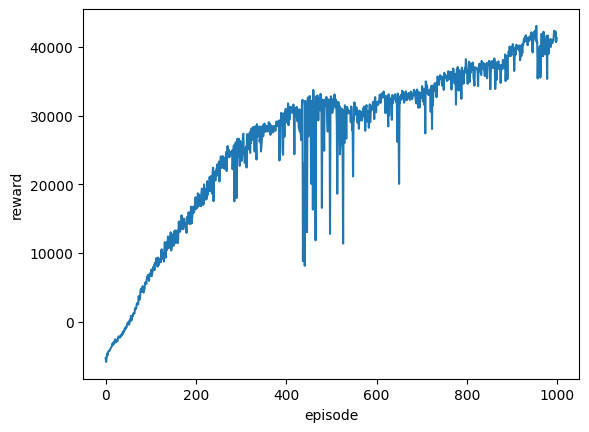

In [23]:
import matplotlib.pyplot as plt
plt.plot(agent.all_rewards)
plt.xlabel('episode')
plt.ylabel('reward')    

In [4]:
def create_env(render_mode: str = 'human'):
    env = gym.make_vec('HalfCheetah-v5', render_mode = render_mode)
    env = NumpyToTorch(env)

    return env 

agent = Agent.load_agent('models/halfcheetah.pt', device)
agent.actor.eval()
agent.critic.eval()
env = create_env()

In [5]:
evaluate(env, 5, agent)

evaluation reward: 1144.7275374236062
evaluation reward: 6214.163440829489
evaluation reward: 6267.195993414627
evaluation reward: 6280.977909438242
evaluation reward: 6275.4687732430575
average reward: 5236.506730869804


In [11]:
env.close()

In [6]:
env = create_env('rgb_array')
evaluate(env, 100, agent)

evaluation reward: 6276.962158373946
evaluation reward: 6310.226317271367
evaluation reward: 5979.870922366432
evaluation reward: 6068.854778062751
evaluation reward: 6162.000988028685
evaluation reward: 6374.636010899992
evaluation reward: 6324.759274777449
evaluation reward: 6169.771809493848
evaluation reward: 6183.64547986943
evaluation reward: 6331.000112476365
evaluation reward: 6239.102967688968
evaluation reward: 6234.9795094712235
evaluation reward: 6246.157608887503
evaluation reward: 6167.037623551474
evaluation reward: 6078.934080094746
evaluation reward: 6019.291723077609
evaluation reward: 6235.878667089396
evaluation reward: 6342.152267696484
evaluation reward: 6117.302653572664
evaluation reward: 6179.969515276534
evaluation reward: 6349.042737898364
evaluation reward: 6439.977669786392
evaluation reward: 6524.407718217485
evaluation reward: 6345.992269049479
evaluation reward: 6013.103015362492
evaluation reward: 6346.670942234291
evaluation reward: 6476.893169656037
e